In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_excel(r'C:\Users\belewaut\Downloads\20210829_coolblue_raw_data_Telefonie.xlsx')

In [90]:
#reorganising column price, using the rstrip() method - removes any trailing characters (keep ',' that indicates decimals')
df['price'] = df['price'].str.replace(r'-','')
df['price'] = df['price'].str.rstrip(',')
df['price'] = df['price'].str.rstrip(' ')
df['price'].head(5)

0     1.799
1     1.049
2       489
3    863,99
4       449
Name: price, dtype: object

In [91]:
#will not use last two columns
df = df.drop(columns=["product_class","date_of_scrape"])

In [92]:
#checking dtypes of all columns, in order to reset to correct formats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_description  2552 non-null   object 
 1   price                2552 non-null   object 
 2   rating               2552 non-null   float64
 3   amount_reviews       2552 non-null   object 
 4   product_category     2552 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.8+ KB


In [93]:
#price, rating and amount_reviews need to be float, int, int 
df["price"] = df['price'].str.replace(r'.','')
df["price"] = df['price'].str.replace(r',','.')
df["price"] = pd.to_numeric(df['price'], errors = 'raise')

In [94]:
#price, rating and amount_reviews need to be float, int, int 
df["amount_reviews"] = df['amount_reviews'].str.replace(r' reviews','')

In [95]:
#price, rating and amount_reviews need to be float, int, int 
df["amount_reviews"] = df['amount_reviews'].str.replace(r'1 review','1')
df["amount_reviews"] = df['amount_reviews'].fillna(0.0).astype(int)

In [96]:
#price, rating and amount_reviews need to be float, int, int 
df["rating"] = pd.to_numeric(df['rating'], errors = 'raise')

In [97]:
df.head(10)

,product_description,price,rating,amount_reviews,product_category
0,Samsung Galaxy Z Fold 3 256GB Zwart 5G,1799.00,5.0,2,mobiele-telefoons
1,Samsung Galaxy Z Flip 3 128GB Zwart 5G,1049.00,0.0,0,mobiele-telefoons
2,Samsung Galaxy S20 FE 128GB Blauw 4G,489.00,4.5,331,mobiele-telefoons
3,Apple iPhone 12 128GB Zwart + Apple Usb C Opla...,863.99,4.5,408,mobiele-telefoons
4,Samsung Galaxy A52s 128GB Groen 5G,449.00,0.0,0,mobiele-telefoons
5,Apple iPhone SE 64GB Zwart + Apple Usb C Oplad...,503.99,4.5,999,mobiele-telefoons
6,Apple iPhone 12 128GB Zwart + Accessoirepakket...,955.92,0.0,0,mobiele-telefoons
7,Samsung Galaxy S21 128GB Grijs 5G,779.00,4.5,112,mobiele-telefoons
8,Apple iPhone 11 128 GB Zwart + Accessoirepakket,798.93,0.0,0,mobiele-telefoons
9,Samsung Galaxy A72 128GB Zwart,439.00,4.5,96,mobiele-telefoons


In [98]:
#renaming mobiele telefoons + filtering df on smartphones
df["product_category"] = df["product_category"].str.replace(r'mobiele-telefoons','smartphones')
df_smartphones_only = df['product_category']=='smartphones'
df = df[df_smartphones_only]
df[['brand', 'product_description']] = df['product_description'].str.split(' ', 1, expand=True)

In [99]:
#getting all unique smartphone brands
df['brand'].unique()

array(['Samsung', 'Apple', 'OnePlus', 'MagSafe', 'OPPO', 'Sony',
       'Motorola', 'Xiaomi', 'Nokia', 'Starterspakket', 'Cat', 'CAT',
       'Fysic', 'CrossCall', 'Emporia'], dtype=object)

In [100]:
df = df[df.brand != "Starterspakket"]

In [101]:
df['brand'].value_counts()

Apple        176
Samsung      143
Xiaomi        26
OnePlus       26
OPPO          24
MagSafe       12
Nokia         11
Motorola       8
Emporia        4
Sony           2
Cat            1
CrossCall      1
Fysic          1
CAT            1
Name: brand, dtype: int64

In [102]:
df['brand'] = df['brand'].apply(lambda x:x.lower())

Text(0.5, 1.02, 'All smartphones brand sold by coolblue')

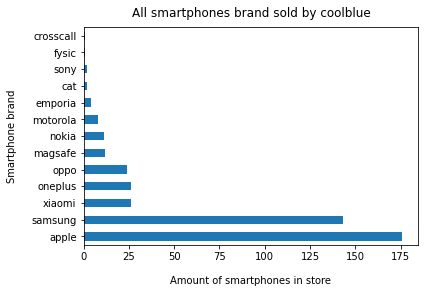

In [103]:
#horizontal bar plot
df['brand'].value_counts().plot(kind='barh') 
plt.xlabel("Amount of smartphones in store", labelpad=14)
plt.ylabel("Smartphone brand", labelpad=14)
plt.title("All smartphones brand sold by coolblue", y=1.02)